In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris virginica

### Training using LinearSVC

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [5]:
#svm_classifier = Pipeline([
#                         ("scaler", StandardScaler()),
#                          ("linear_svc",LinearSVC(C=1, loss="hinge"))
#                          ])
svm_classifier = LinearSVC(C=1, loss="hinge") # Tune C
svm_classifier.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

### Training using SVC with linear kernel

In [6]:
from sklearn.svm import SVC

In [7]:
svm_classifier2 = SVC(kernel='linear', C=1) # Tune C
svm_classifier2.fit(X,y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Visualise

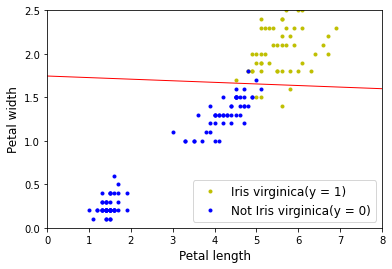

In [8]:
#Plot data points
plt.plot(X[y==1][:,0], X[:,1][y==1], 'y.', label = 'Iris virginica(y = 1)')
plt.plot(X[y==0][:,0], X[:,1][y==0], 'b.', label = 'Not Iris virginica(y = 0)')
plt.xlabel('Petal length',fontsize=12)
plt.ylabel('Petal width',fontsize=12)
plt.legend(loc="lower right", fontsize=12)

#Plot decision boundary
X_grid = np.linspace(0, 8, 1000)

theta0 = svm_classifier.intercept_
[[theta1, theta2]] = svm_classifier.coef_
#theta1 = svm_classifier.coef_[0,0]
#theta2 = svm_classifier.coef_[0,1]

boundary = -(theta0 + theta1 * X_grid)/theta2
plt.plot(X_grid, boundary, 'r-', linewidth=1)
plt.axis([0, 8, 0, 2.5])
plt.show()

### Performance

In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(svm_classifier, X, y, cv=3, scoring="accuracy")# The cv parameter is basically diving the test set into that many parts and training on one while testing on other

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([0.98, 0.96, 0.8 ])

In [12]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(svm_classifier, X, y, cv=3)
# We dont want to use the test for now so we make predictions in train set
# cross_val_predict will perform K-fold cross-validation to predict from train set such that prediction made on an eg. is not used in training the model

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [13]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

conf_matrix = confusion_matrix(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print(conf_matrix)
print(precision)
print(recall)
print(f1)

[[90 10]
 [ 3 47]]
0.8245614035087719
0.94
0.8785046728971964
